# Image classification with Convlutional Neural Networks

### Importing libraraies

In [3]:
!conda install -c conda-forge opencv

In [1]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading Cifar-10 data from keras dataset
CIFAR-10 is a labelled subset of the 80M images dataset. It contains a total of 60K images in 10 classes (50k train, 10k test). [https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html). 

* each image is 32x32 pixel image with RGB channels

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [4]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
train_labels[:20]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6]], dtype=uint8)

### Lookup list

In [7]:
lookup = [
    'Airplane',
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

### Displaying image

In [8]:
def show_img(images, labels, n_images):
    """
    Select and display random sample of images as 
    specified by size of sample
    """
    random_int = randint(0, labels.shape[0] - n_images)
    
    imgs, labels = images[random_int : random_int + n_images], \
        labels[random_int : random_int +  n_images]
    
    _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))

    for fig, img, label in zip(figs, imgs, labels):
        fig.imshow(img)
        ax = fig.axes
        
        ax.set_title(lookup[int(label)])
        
        ax.title.set_fontsize(20)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

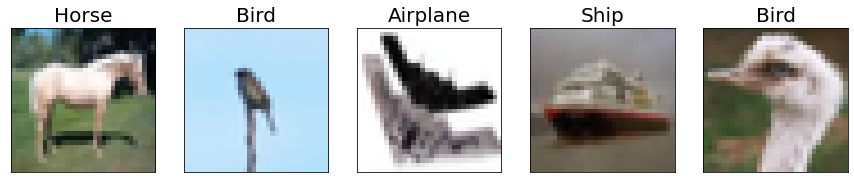

In [9]:
show_img(train_images, train_labels, 5)

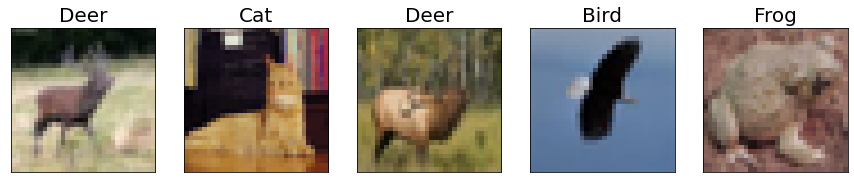

In [10]:
show_img(train_images, train_labels, 5)

### Saving images in respective folder

In [35]:
train_dir = './/datasets//train//'
test_dir = './/datasets//test//'

In [19]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [36]:
os.path.exists(train_dir)

True

In [38]:
# training images
i = 0

for img, label in zip(train_images, train_labels):
    
    path = train_dir + str(lookup[int(label)])
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
    
    i += 1
    cv2.waitKey(0)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [13]:
# test images
i = 0

for img, label in zip(test_images, test_labels):

    path = test_dir + str(lookup[int(label)])
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
 
    i += 1
    
    cv2.waitKey(0)

### Data Preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

* Read images from the disk.
* Decode contents of these images and convert it into proper grid format as per their RGB content.
* Convert them into floating point tensors.
* Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by tf.keras.

In [39]:
train_image_generator = ImageDataGenerator(rescale=1./255) # recscale pixel values to [0,1]

test_image_generator = ImageDataGenerator(rescale=1./255)

After defining the generators for training and validation images, the flow_from_directory method loads images from the disk, applies rescaling, and resizes the images into the required dimension. We haven't applied any data augmentation techniques here, we'll work with the images as is.

In [40]:
batch_size = 128

In [41]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True, #shuffles classes
                                                           target_size=(32, 32))

Found 50000 images belonging to 10 classes.


In [42]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 10000 images belonging to 10 classes.


In [43]:
sample_batch = next(train_data_gen)

sample_batch[0].shape # (n_samples, height, width, n_channels)

(128, 32, 32, 3)

### Building model

In [44]:
conv_model = tf.keras.models.Sequential([

    # 2D convoution layer with 3x3 kernel. Generates output 16 feature maps deep. Padding = "same" means output size = input size
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', 
                  input_shape=sample_batch[0].shape[1:]),
    # 2D convoution layer with 3x3 kernel. Generates output 32 feature maps deep. Padding = "same" means output size = input size    
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    # Max pooling layer with kernel size 2x2
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Final image data before passing through dense FF network
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')

])

### Compile model
For multi-class classification:
- when target labels are one-hot encoded, use `CategoricalCrossentropy` loss
- when target labels are numeric integers, use `SparseCategoricalCrossentropy` loss

In [45]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

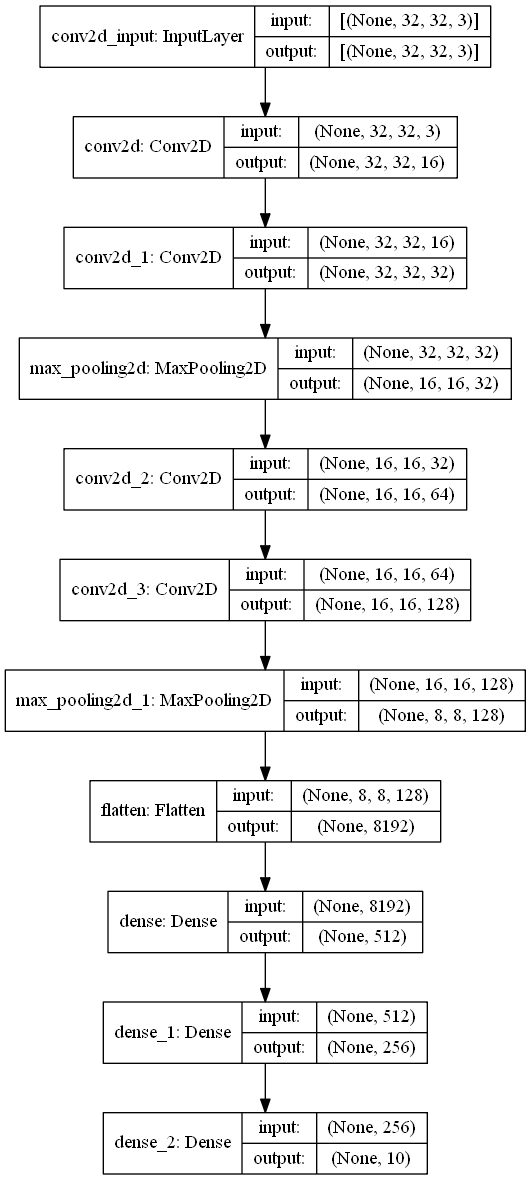

In [46]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

### Training model

In [48]:
training_hist = conv_model.fit(train_data_gen,
                               epochs=5,
                               steps_per_epoch=len(train_images) // batch_size,
                               validation_data=test_data_gen,
                               validation_steps=len(test_images) // batch_size)

Epoch 1/5


C:\Users\user\.conda\envs\py38\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


390/390 [==============================] - 1091s 3s/step - loss: 1.4363 - accuracy: 0.4798 - val_loss: 1.1023 - val_accuracy: 0.6012
Epoch 2/5
390/390 [==============================] - 204s 522ms/step - loss: 0.9314 - accuracy: 0.6703 - val_loss: 0.8477 - val_accuracy: 0.7038
Epoch 3/5
390/390 [==============================] - 173s 444ms/step - loss: 0.7195 - accuracy: 0.7479 - val_loss: 0.7534 - val_accuracy: 0.7400
Epoch 4/5
390/390 [==============================] - 173s 443ms/step - loss: 0.5712 - accuracy: 0.7990 - val_loss: 0.7158 - val_accuracy: 0.7567
Epoch 5/5
390/390 [==============================] - 173s 444ms/step - loss: 0.4229 - accuracy: 0.8507 - val_loss: 0.7563 - val_accuracy: 0.7575


### Plotting accuracy and loss with epoch both for training and validation

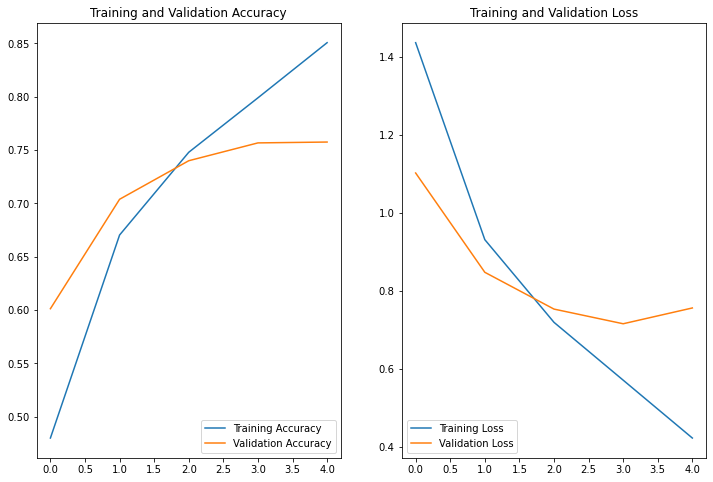

In [52]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss')
plt.show()

### Testing - inspect predicted vs actual images

#### Test 1:

In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
test_images[0].shape

(32, 32, 3)

In [55]:
def perform_test(model, img, label):
    plt.imshow(img)
    
    test_img = np.expand_dims(img, axis=0)
    result = model.predict(test_img)
    
    print('Actual label: ', lookup[int(label)])
    print('Predicted label: ', lookup[np.argmax(result)])

Actual label:  Cat
Predicted label:  Truck


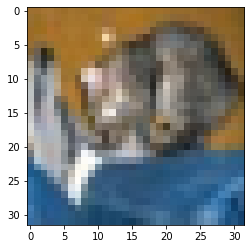

In [56]:
perform_test(conv_model, test_images[0], test_labels[0])

Actual label:  Ship
Predicted label:  Airplane


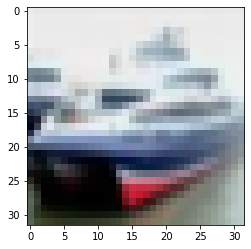

In [31]:
perform_test(conv_model, test_images[1], test_labels[1])

Actual label:  Airplane
Predicted label:  Airplane


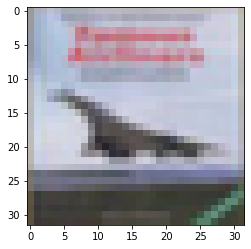

In [32]:
perform_test(conv_model, test_images[3], test_labels[3])

Actual label:  Automobile
Predicted label:  Automobile


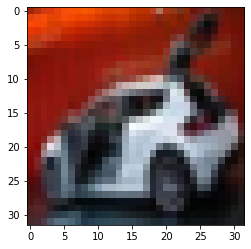

In [33]:
perform_test(conv_model, test_images[6], test_labels[6])

## Model tuning
- apply random data perturbation / data augmentation to mitigate overfitting
- perturbations include `horizontal_flip`, `rotation_range`, `zoom_range`, `width_shift_range`, `height_shift_range`

Found 50000 images belonging to 10 classes.


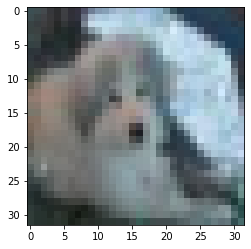

In [57]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))


plt.imshow(train_data_gen[0][0][0])

Found 50000 images belonging to 10 classes.


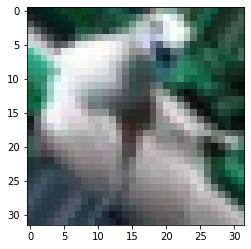

In [35]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=60)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Found 50000 images belonging to 10 classes.


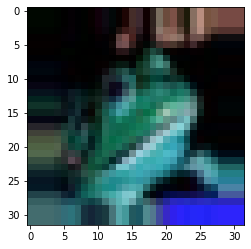

In [36]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Found 50000 images belonging to 10 classes.


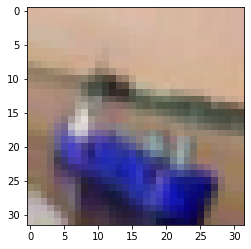

In [58]:
# apply multiple data augmentations at once
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=.05,
    height_shift_range=.05,
    horizontal_flip=True,
    zoom_range=0.3
)

train_data_gen_aug = image_gen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(32, 32))

plt.imshow(train_data_gen_aug[0][0][0])

### Building model with dropout

In [59]:
conv_model_with_dropout = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu', 
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Dropout(0.25),

    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    
    layers.Dropout(0.25),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [60]:
conv_model_with_dropout.compile(optimizer='adam',
                                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                metrics=['accuracy'])

### Training model

In [61]:
training_hist = conv_model_with_dropout.fit(train_data_gen_aug, 
                                            epochs=5,
                                            steps_per_epoch=len(train_images) // batch_size,
                                            validation_data=test_data_gen,
                                            validation_steps=len(test_images) // batch_size)

Epoch 1/5
390/390 [==============================] - 1425s 4s/step - loss: 1.7146 - accuracy: 0.3692 - val_loss: 1.4360 - val_accuracy: 0.4716
Epoch 2/5
390/390 [==============================] - 186s 476ms/step - loss: 1.4147 - accuracy: 0.4899 - val_loss: 1.2038 - val_accuracy: 0.5641
Epoch 3/5
390/390 [==============================] - 187s 480ms/step - loss: 1.2700 - accuracy: 0.5457 - val_loss: 0.9903 - val_accuracy: 0.6411
Epoch 4/5
390/390 [==============================] - 192s 493ms/step - loss: 1.1583 - accuracy: 0.5844 - val_loss: 0.9759 - val_accuracy: 0.6521
Epoch 5/5
390/390 [==============================] - 191s 490ms/step - loss: 1.0958 - accuracy: 0.6131 - val_loss: 0.9440 - val_accuracy: 0.6670


### Plotting accuracy and loss with epoch for training and validation

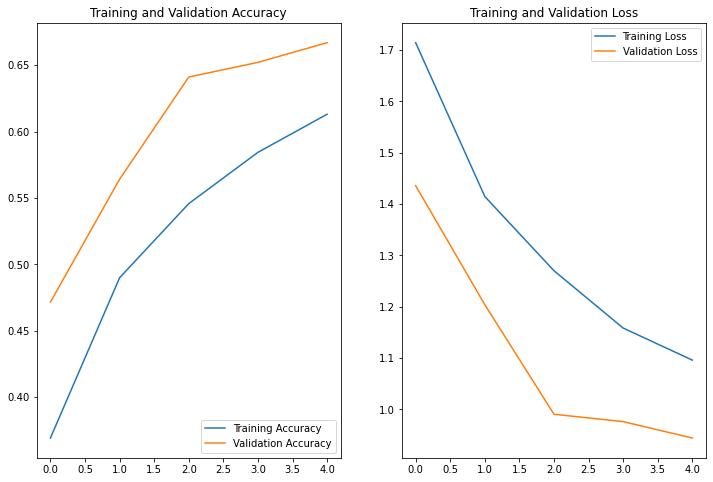

In [62]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss=training_hist.history['loss']
val_loss=training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Actual label:  Ship
Predicted label:  Airplane


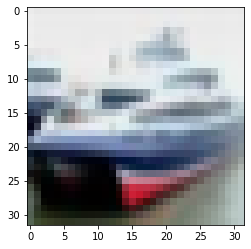

In [63]:
perform_test(conv_model_with_dropout, test_images[1], test_labels[1])

Actual label:  Airplane
Predicted label:  Airplane


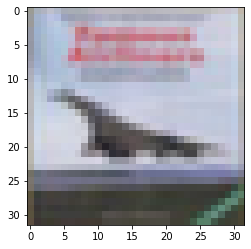

In [64]:
perform_test(conv_model_with_dropout, test_images[3], test_labels[3])

Actual label:  Airplane
Predicted label:  Airplane


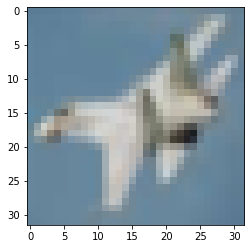

In [65]:
perform_test(conv_model_with_dropout, test_images[10], test_labels[10])

Actual label:  Deer
Predicted label:  Airplane


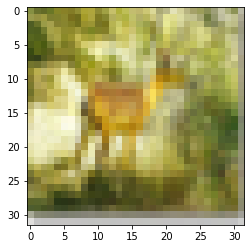

In [66]:
perform_test(conv_model_with_dropout, test_images[500], test_labels[500])

Actual label:  Dog
Predicted label:  Dog


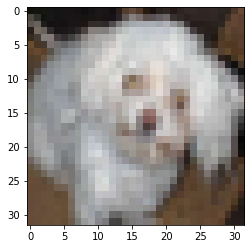

In [67]:
perform_test(conv_model_with_dropout, test_images[1000], test_labels[1000])

Actual label:  Automobile
Predicted label:  Automobile


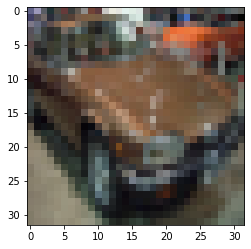

In [68]:
perform_test(conv_model_with_dropout, test_images[2000], test_labels[2000])